In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import h5py 
import numpy as np

In [10]:
img_width, img_height = 150, 150

train_data_dir = '../data/train.h5'
validation_data_dir = '../data/val.h5'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss      = 'binary_crossentropy',
              optimizer = 'adam',
              metrics   = ['accuracy'])

In [14]:
node_train = h5py.File('../data/train.h5', 'r')
X_train, y_train = np.array(node_train.get('X')), np.array(node_train.get('y'))
node_train.close()

node_val = h5py.File('../data/val.h5', 'r')
X_val, y_val = np.array(node_val.get('X')), np.array(node_val.get('y'))
node_val.close()

node_test = h5py.File('../data/test.h5', 'r')
X_test, y_test = np.array(node_test.get('X')), np.array(node_test.get('y'))
node_test.close()

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range  = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode = 'binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('weights.h5')

### CNN Implementation in Keras using MNIST dataset

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils  import to_categorical
from keras.datasets import mnist as MNIST 

(X_train, y_train), (X_test, y_test) = MNIST.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test,  num_classes = 10)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,  activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.7738 - accuracy: 0.8633 - val_loss: 0.1269 - val_accuracy: 0.9684
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1603 - accuracy: 0.9535 - val_loss: 0.0927 - val_accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1080 - accuracy: 0.9682 - val_loss: 0.0766 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0876 - accuracy: 0.9748 - val_loss: 0.0810 - val_accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0749 - accuracy: 0.9779 - val_loss: 0.1043 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0759 - val_accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0531 - accuracy: 0.9843 - val_loss: 0.0867 -

### LeNet Implementation in Keras using MNIST dataset

In [34]:
lenet_model = Sequential()
lenet_model.add(Conv2D(6, kernel_size = (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
lenet_model.add(MaxPooling2D(pool_size = (2, 2)))
lenet_model.add(Conv2D(16, kernel_size = (10, 10), activation = 'relu'))
lenet_model.add(MaxPooling2D(pool_size = (2, 2)))
lenet_model.add(Flatten())
lenet_model.add(Dense(120, activation = 'relu'))
lenet_model.add(Dense(10, activation = 'softmax'))

lenet_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
lenet_hist = lenet_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1654 - accuracy: 0.5685 - val_loss: 0.7528 - val_accuracy: 0.6849
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6392 - accuracy: 0.7665 - val_loss: 0.2765 - val_accuracy: 0.9174
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2175 - accuracy: 0.9359 - val_loss: 0.1525 - val_accuracy: 0.9562
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1434 - accuracy: 0.9571 - val_loss: 0.1362 - val_accuracy: 0.9609
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1086 - accuracy: 0.9673 - val_loss: 0.1215 - val_accuracy: 0.9643
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0899 - accuracy: 0.9730 - val_loss: 0.1028 - val_accuracy: 0.9701
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0834 - accuracy: 0.9748 - val_loss: 0.0998 - val

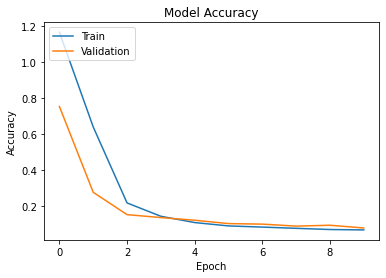

In [37]:
from matplotlib import pyplot as plt

plt.plot(lenet_hist.history['loss'])
plt.plot(lenet_hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### AlexNet Implementation in Keras using MNIST dataset

In [3]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32')  / 255

y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test,  num_classes = 10)

In [13]:
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 384)       885120    
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 384)        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)